# Classifiers

## Perceptron

See [this documentation to get and understanding of the perceptron](https://jbcodeforce.github.io/ML-studies/coding/classifier/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the two [IRIS flower](https://en.wikipedia.org/wiki/Iris_flower_data_set) characteristic data: Setosa, Virginica and Versicolor from the Iris dataset, and plot them by petal length and sepal length.

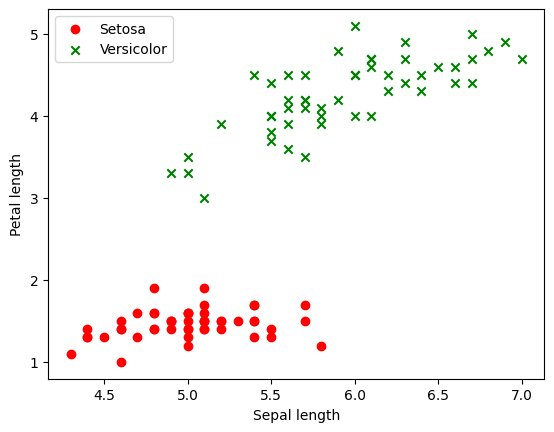

In [2]:
df=pd.read_csv('../../data/iris_data.txt',header=None)
# load the first 100 records
y=df.iloc[0:100,4].values
# for neural network dual class label should be -1 or 1, so modify y
y = np.where( y == 'Iris-setosa', -1, 1)
# take the columns 0,1: sepal and petal length
X=df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='green',marker='x',label='Versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend( loc ='upper left')
plt.show()

What is the best boundary to help classify iris flowers?. 
To do so we use the Perceptron class trained with the 100 first flower records. The perceptron code looks like the code below in next cell.

The net input function is computing the $W^T*x$ dot product but uses a $w_0$ variable. The perceptron learning rule is $\eta*(y_i - k_i)*x_i$ $k_i$ is the known answer of the i th sample. The weight update is proportional to the value of $X_i$. $\eta$ is the learning rate.

In [3]:
class Perceptron(object):
    '''
    Perceptron classifier is based on Rosenblatt's algorithm unit step function.
    Based on the human neuron model, Frank Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a neuron fires or not. In the context of supervised learning and classification, such an algorithm could then be used to predict if a sample belonged to one class or the other.
    '''
    def __init__(self, eta=0.01,nbOfIteration=10):
        '''
        Constructor: eta is the learning rate between 0 and 1. The # of iteration
        to compute the weights by going n loop over the training set
        '''
        self.eta=eta
        self.nbOfIteration=nbOfIteration

    def fit(self,X,y):
        ''' Fit the training data given the matrix X of the samples/features and y the matching classes
        Recompute the weight if there is a delta between the predicted value and the expected value
        X : {array-like}, shape = [n_samples, p_features]
        y : array-like, shape = [n_samples] of class labels
        '''
        self.weights=np.zeros(1+X.shape[1])
        # list of misclassifications during the epochs
        self.errors=[]

        for _ in range(self.nbOfIteration):
            error=0
            # iterate over the 'sample' row of X and y, stop on shortest list between X & y(the use of zip)
            for xi,target in zip(X,y):
                # update the weights according to the perceptron learning rule
                update=self.eta*(target - self.predict(xi))
                self.weights[1:]+=update * xi
                self.weights[0]+=update
                error+=int(update != 0.0)
            self.errors.append(error)
        return self

    def netInput(self,X):
        # calculate the vector dot product wT * x, or equivalent to
        # compute z = sum(x(i) * w(i)) for i from 1 to n, add the threshold
        return np.dot(X,self.weights[1:]) + self.weights[0]

    def predict(self,X):
        # predict the class label
        # unit step function: return -1 or 1 depending of the
        # net input compared to a threshold
        return np.where(self.netInput(X)>=0.0,1,-1)

To simplify the presentation of the data into graph we define a tool class

In [4]:
from matplotlib.colors import ListedColormap

def displayDecisionRegions(X,y,classifier,resolution=0.2,test_idx=None,xlabel=None,ylabel=None,label1='1',label0='0',label2='2',title='classifier'):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('gray', 'green', 'blue', 'red', 'cyan')
    cmap = ListedColormap( colors[: len( np.unique( y))])
    # determine the min and max value for the two features used
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # build a grid array, using evenly spaced values within interval min max for each features
    xx1,xx2=np.meshgrid( np.arange( x1_min, x1_max, resolution), np.arange( x2_min, x2_max, resolution))
    # Predict the boundary by using a X = progressing values from x1 min to x1 max (x2 min, x2 max)
    Z = classifier.predict( np.array([ xx1.ravel(), xx2.ravel()]).T)
    # reshape Z as matrix
    Z = Z.reshape( xx1.shape)
    # draw contour plot
    plt.contourf( xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim( xx1.min(), xx1.max())
    plt.ylim( xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate( np.unique( y)):
        if cl == 2:
            aclass=label2
        else:
            if cl == 0:
                aclass=label0
            else:
                aclass=label1
        plt.scatter( x = X[ y == cl, 0],
                     y = X[ y == cl, 1],
                     alpha = 0.8,
                     c = cmap( idx),
                     marker = markers[ idx],
                     label = aclass)
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha=1.0,linewidths=1,marker='o',s=55,label='Test set')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend( loc ='upper left')
    plt.show()


/var/folders/dp/0b2q97nx3s56mg16tvc2wb140000gr/T/ipykernel_18219/437823139.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter( x = X[ y == cl, 0],


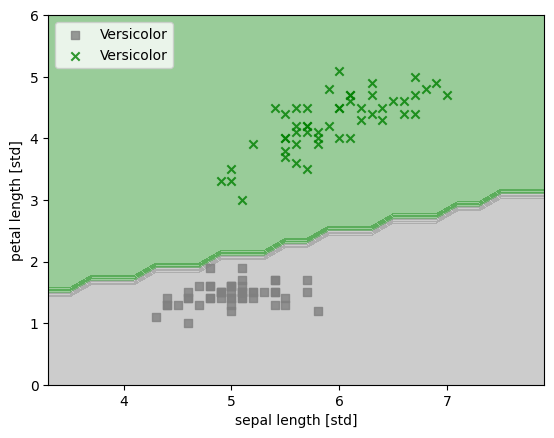

In [5]:

ppn = Perceptron(0.01,10)
ppn.fit(X,y)
displayDecisionRegions( X, y, classifier = ppn,
        xlabel='sepal length [std]',ylabel='petal length [std]',label0='Setosa',label1='Versicolor')


The errors array is used to keep the misclassifications done during the iterations processing or epochs. The following code illustrates the errors rate per iteration:

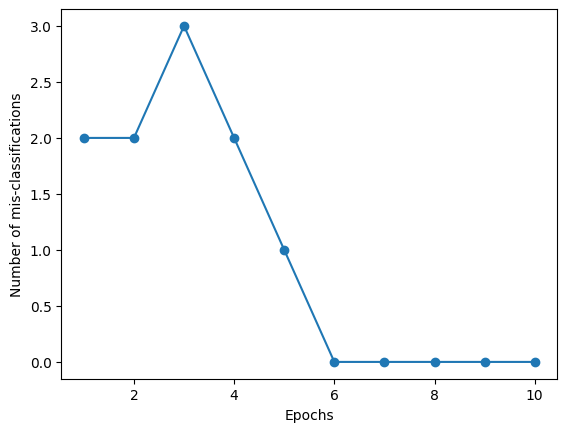

In [6]:
plt.plot(range( 1, len( ppn.errors) + 1),ppn.errors, marker ='o')
plt.xlabel('Epochs')
plt.ylabel('Number of mis-classifications')
plt.show()

It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small. The following test illustrates the convergence using different values for $\eta$


## ADAptive LInear NEuron classifier:
In ADALINE the weights are updated based on a linear activation function (the identity function) rather than a unit step function like in the perceptron.
One of the key ingredients of supervised machine learning algorithms is to define an objective function that is to be optimized during the learning process. This objective function is often a cost function that we want to minimize. So the weights update will minimize the cost function. The cost function could be the sum squared errors between the outcomes and the target label:
$$J(w)=\frac{1}{2}*\sum_{i=0}^m(y_i-\phi(z_i))^2$$

where $y_i$ is the expected class and $\phi$ is the output function $W^T*X$

which in python may look like the code below:
```python
  output = np.dot(X,self.weights[1:]) + self.weights[0]
  errors = (y - output)
  cost = (errors** 2).sum() / 2.0
```
The operators are on matrix as X is a matrix and y a vector.

The cost function is convex continuous linear and can be derived to compute the gradient descent algorithm to find the local minima.
The weight difference is computed as the negative gradient * the learning rate eta. To compute the gradient of the cost function, we need to compute the partial derivative of the cost function with respect to each weight w(j). So putting all together we have:

$$-\eta*\frac{\delta J}{\delta W}=\eta*\sum_{i=0}^m(y_i-\phi(z_i))*X_i$$

the weight update is calculated based on all samples in the training set (instead of updating the weights incrementally after each sample), which is why this approach is also referred to as "batch" gradient descent.
So basically to minimize the cost function we took steps into the opposite direction of a gradient calculated from the entire training set.


The adaline using the gradiant descent is defined as the class below.

In [7]:
class AdalineGradiantDescent(object):

    def __init__(self, eta=0.01,nbOfIteration=10):
        '''
        eta is the learning rate between 0 and 1. The # of iteration
        to train by going n times over the training set
        '''
        self.eta=eta
        self.nbOfIteration=nbOfIteration

    def fit(self,X,y):
        ''' Fit the training data given within the matrix X of the samples/features and y the matching classes
        Recompute the weight if there is a delta between the predicted value and the expected value
        X : {array-like}, shape = [n_samples, n_features]
        y : array-like, shape = [n_samples] of class labels
        '''
        # the number of weights = nb of features + 1.
        self.weights=np.zeros(1+X.shape[1])
        self.costs=[]
        for _ in range(self.nbOfIteration):
            output = self.netInput(X)
            errors = (y - output)
            # calculate the gradient based on the whole training dataset. Use the matrix vector *
            # between the feature matrix and the error vector
            self.weights[1:] += self.eta * X.T.dot( errors)
            self.weights[0]  += self.eta * errors.sum()
            cost = (errors** 2).sum() / 2.0
            # keep cost computed at each iteration to assess convergence.
            self.costs.append(cost)
        return self

    def netInput(self,X):
        # compute z = sum(x(i) * w(i)) for i from 1 to n, add the threshold
        return np.dot(X,self.weights[1:]) + self.weights[0]

    def activation( self, X):
        """ Compute linear activation"""
        return self.netInput( X)

    def predict(self,X):
        # unit step function. Compute the net input and compares it a threshold
        return np.where(self.activation(X)>=0.0,1,-1)

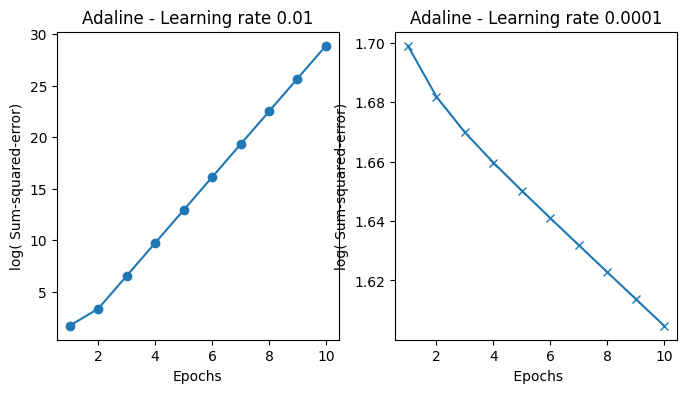

In [8]:
# present the convergence curves for two values of eta.
fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize =( 8, 4))
# the eta is too high, the errors are becoming larger as local minima is overshoot
ada1 = AdalineGradiantDescent( nbOfIteration = 10, eta = 0.01)
ada1.fit( X, y)
ax[0].plot(range( 1, len( ada1.costs) + 1), np.log10( ada1.costs), marker ='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log( Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGradiantDescent( nbOfIteration = 10, eta = 0.0001)
ada2.fit( X, y)
ax[1].plot(range( 1, len( ada2.costs) + 1), np.log10( ada2.costs), marker ='x')
ax[1].set_xlabel(' Epochs')
ax[1].set_ylabel('log( Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()


### Stochastic gradient descent
The previous approach can take a lot of time when the dataset includes millions of records.
A more efficient approach is to take the stochastic gradient descent. It is used with online training, where the algorithm is trained on-the-fly, while new training set arrive.
The weights are computed with 

$$\eta*(y_i-\phi(z_i))*X_i$$

The class below uses this approach


To obtain accurate results via stochastic gradient descent, it is important to present it with data in a random order, which is why we want to shuffle the training set for every epoch to prevent cycles.


In [9]:
from numpy.random import seed
class AdalineStockaticGradiantDescent(object):
    def __init__(self, eta=0.01,nbOfIteration=10,shuffle=True,randomState=None):
        '''
        Constructor
        '''
        self.eta=eta
        self.nbOfIteration=nbOfIteration
        self.shuffle=shuffle
        self.weightInitialized=False
        if randomState:
            seed(randomState)

    def fit(self,X,y):
        self.initWeights(X.shape[1])
        self.costs=[]
        for _ in range(self.nbOfIteration):
            if self.shuffle:
                X, y = self.shuffleData( X, y)
            cost = []
            for xi, target in zip( X, y):
                cost.append( self.updateWeights( xi, target))
            averageCost = sum(cost)/ len( y)
            self.costs.append( averageCost)
        return self

    def initWeights(self,m):
        # init weigths with zero
        self.weights=np.zeros(1+m)
        self.weightInitialized=True

    def updateWeights(self,xi,target):
        """ update the weights incrementally for each training sample.
        xi a sample of th feature: a row of the matrix
        """
        output = self.netInput( xi)
        error = (target - output)
        self.weights[1:] += self.eta * xi.dot( error)
        self.weights[0] += self.eta * error
        cost = (error** 2)/ 2.0
        return cost

    def shuffleData(self,X,y):
        """ Shuffle training data"""
        r = np.random.permutation( len( y))
        return X[ r], y[ r]

    def netInput(self,X):
        # compute z = sum(x(i) * w(i)) for i from 1 to n, add the threshold
        return np.dot(X,self.weights[1:]) + self.weights[0]

    def activation( self, X):
        """ Compute linear activation"""
        return self.netInput( X)

    def predict(self,X):
        # unit step function. Compute the net input and compares it a threshold
        return np.where(self.activation(X)>=0.0,1,-1)

    def partialFit(self,X,y):
        # Fit without init the weights
        if not self.weightInitialized:
            self.initWeights(X.shape[1])
        if y.ravel.shape[0] > 1:
            for xi, target in zip( X, y):
                self.updateWeights( xi, target)
        else:
            self.updateWeights(X,y)
        return self


When the features are standardized (each feature value is reduced by the mean and divided by the standard deviation) the ADALine algorithm converges more quickly.


>> Display Decision regions


/var/folders/dp/0b2q97nx3s56mg16tvc2wb140000gr/T/ipykernel_18219/437823139.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter( x = X[ y == cl, 0],


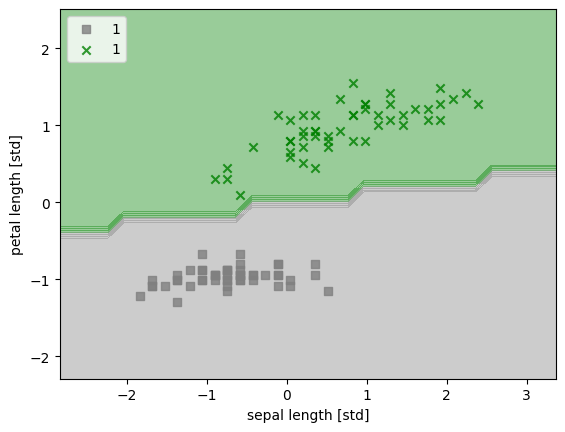

>> Display cost function


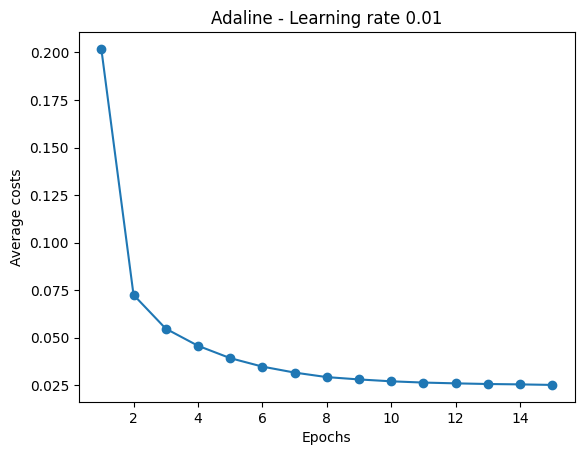

In [10]:

def prepareTraining():
    X_std = np.copy(X)
    X_std[:,0]=(X[:,0]-np.mean(X[:,0]))/np.std(X[:,0])
    X_std[:,1]=(X[:,1]-np.mean(X[:,1]))/np.std(X[:,1])
    return X_std,y
    
X_std,y=prepareTraining();
ada=AdalineStockaticGradiantDescent(nbOfIteration = 15, eta = 0.01,randomState=1)
ada.fit(X_std, y)
print(">> Display Decision regions")
displayDecisionRegions( X_std, y, classifier = ada,
   xlabel='sepal length [std]',ylabel='petal length [std]')

print(">> Display cost function")
plt.plot(range( 1, len( ada.costs) + 1),  ada.costs, marker ='o')
plt.xlabel('Epochs')
plt.ylabel('Average costs')
plt.title('Adaline - Learning rate 0.01')
plt.show()